In [1]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')
from __future__ import division
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords
import string
from matplotlib import rcParams
from itertools import chain
from nltk import everygrams, word_tokenize
import pprint
import enchant
import nltk

In [2]:
rcParams['figure.figsize'] = 15, 7
sns.set_style("whitegrid")

In [3]:
def spellcheck(string):
    dictionary = enchant.Dict("en_US")
    number_of_misspelled_words = 0
    for word in string.split():
        if dictionary.check(word) == False:
            number_of_misspelled_words = number_of_misspelled_words + 1
            print word
        else:
            number_of_misspelled_words = number_of_misspelled_words
    return number_of_misspelled_words

In [4]:
def contains_spelling_errors(value):
    boolean = False
    if value > 0:
        boolean = True
    else:
        boolean = boolean
    return boolean

In [5]:
df_train = pd.read_csv('/home/andrew/Desktop/Kaggle_Competition/Data/train.csv', encoding = "utf_8")
df_test = pd.read_csv('/home/andrew/Desktop/Kaggle_Competition/Data/test.csv', encoding = 'utf_8')

In [6]:
stop = stopwords.words('english')

In [7]:
pat = r'\b(?:{})\b'.format('|'.join(stop))
df_train['question_text'] = df_train['question_text'].str.lower()
df_train['question_text'] = df_train['question_text'].str.replace(pat, '')

In [8]:
df_train['question_text_processed'] = df_train['question_text'].str.replace(
    '[{}]'.format(string.punctuation), '')

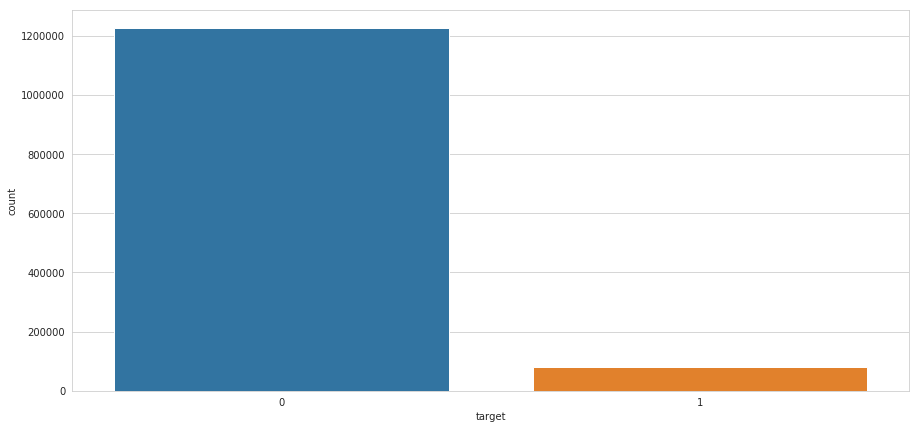

In [9]:
sns.countplot(df_train['target'])

In [10]:
# WARNING: DO NOT EXECUTE UNLESS 100% SURE THIS CODE IS ACCURATE (LONG RUNNING TIME)
#sincere = df_train.loc[df_train['target'] == 0]
#sincere['spelling_error_count'] = sincere['question_text_processed'].apply(spellcheck)
#sincere.to_csv("/home/pc/Desktop/Kaggle_Competition/Data/sincere_data_raw.csv")

In [11]:
# WARNING: DO NOT EXECUTE UNLESS 100% SURE THIS CODE IS ACCURATE (LONG RUNNING TIME)
#insincere = df_train.loc[df_train['target'] == 1]
#insincere['spelling_error_count'] = insincere['question_text_processed'].apply(spellcheck)
#insincere.to_csv("/home/pc/Desktop/Kaggle_Competition/Data/insincere_data_raw.csv")

In [12]:
sincere = pd.read_csv('/home/andrew/Desktop/Kaggle_Competition/Data/sincere_data_raw.csv', encoding = 'utf_8')
insincere = pd.read_csv('/home/andrew/Desktop/Kaggle_Competition/Data/insincere_data_raw.csv', encoding = 'utf_8')

In [13]:
insincere['contains_spelling_errors'] = insincere['spelling_error_count'].apply(contains_spelling_errors)
insincere.drop('Unnamed: 0', axis = 1, inplace = True)
sincere['contains_spelling_errors'] = sincere['spelling_error_count'].apply(contains_spelling_errors)
sincere.drop('Unnamed: 0', axis = 1, inplace = True)

In [14]:
insincere.head()

,qid,question_text,target,question_text_processed,spelling_error_count,contains_spelling_errors
0,0000e91571b60c2fb487,Has the United States become the largest dicta...,1,Has the United States become the largest dicta...,0,False
1,00013ceca3f624b09f42,Which babies are more sweeter to their parents...,1,Which babies are more sweeter to their parents...,0,False
2,0004a7fcb2bf73076489,If blacks support school choice and mandatory ...,1,If blacks support school choice and mandatory ...,1,True
3,00052793eaa287aff1e1,I am gay boy and I love my cousin (boy). He is...,1,I am gay boy and I love my cousin boy He is se...,2,True
4,000537213b01fd77b58a,Which races have the smallest penis?,1,Which races have the smallest penis,0,False


In [15]:
sincere.head()

,qid,question_text,target,question_text_processed,spelling_error_count,contains_spelling_errors
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,How did Quebec nationalists see their province...,0,False
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,Do you have an adopted dog how would you encou...,0,False
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,Why does velocity affect time Does velocity af...,0,False
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,How did Otto von Guericke used the Magdeburg h...,3,True
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,Can I convert montra helicon D to a mountain b...,2,True


In [16]:
total_sincere_spelling_errors = sincere['spelling_error_count'].sum()
total_insincere_spelling_errors = insincere['spelling_error_count'].sum()
print "Total sincere spelling errors:", total_sincere_spelling_errors
print "Total insincere spelling errors:", total_insincere_spelling_errors

In [17]:
total_error_counts = total_sincere_spelling_errors + total_insincere_spelling_errors
number_counts = (total_sincere_spelling_errors / total_error_counts * 100, 
                 total_insincere_spelling_errors / total_error_counts * 100)

Text(0.5,1,'Shallow Calculation of Spelling Error Percentage by Class')

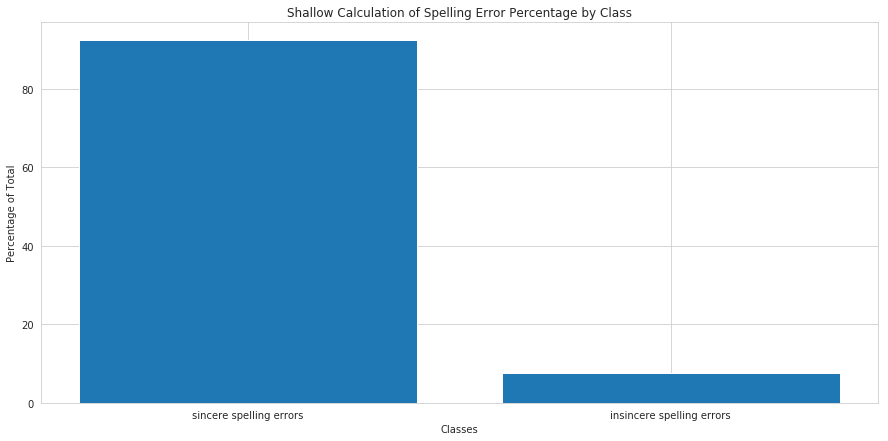

In [18]:
plt.bar(['sincere spelling errors', 'insincere spelling errors'], number_counts)
plt.xlabel("Classes")
plt.ylabel("Percentage of Total")
plt.title("Shallow Calculation of Spelling Error Percentage by Class")

In [19]:
sincere['contains_spelling_errors'].value_counts()

False    716589
True     508723
Name: contains_spelling_errors, dtype: int64

In [20]:
sincere['contains_spelling_errors'].value_counts(normalize = True)

False    0.584822
True     0.415178
Name: contains_spelling_errors, dtype: float64

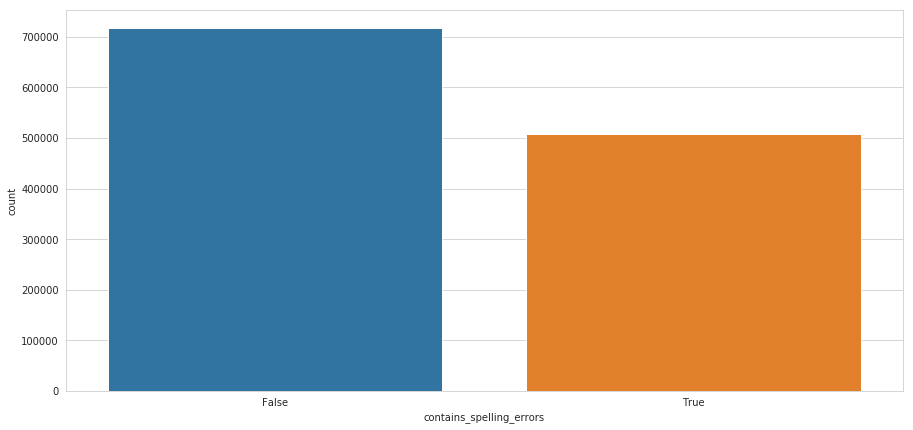

In [21]:
sns.countplot(sincere['contains_spelling_errors'])

In [22]:
insincere['contains_spelling_errors'].value_counts()

False    42977
True     37833
Name: contains_spelling_errors, dtype: int64

In [23]:
insincere['contains_spelling_errors'].value_counts(normalize = True)

False    0.531828
True     0.468172
Name: contains_spelling_errors, dtype: float64

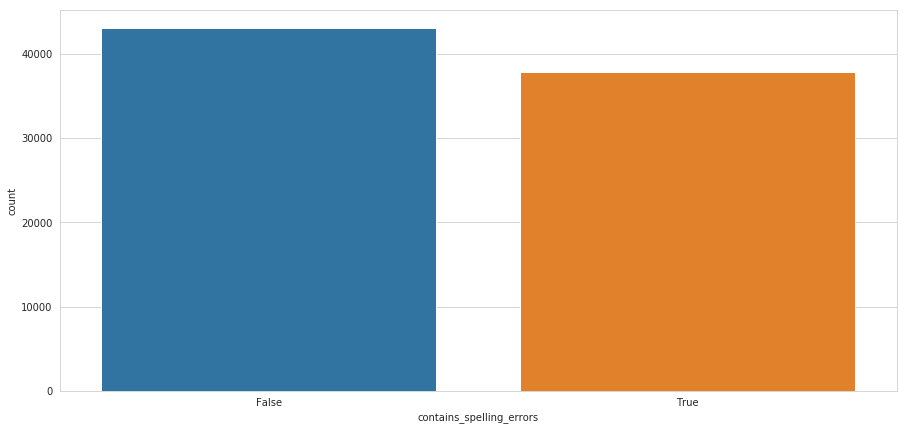

In [24]:
sns.countplot(insincere['contains_spelling_errors'])

In [25]:
insincere_bag_of_words = []
for row in insincere['question_text']:
    for word in row.split():
        insincere_bag_of_words.append(word)
insincere_dictionary = Counter(insincere_bag_of_words)
insincere_count_df = pd.DataFrame.from_dict(insincere_dictionary, orient='index')

In [26]:
sincere_bag_of_words = []
for row in sincere['question_text']:
    for word in row.split():
        sincere_bag_of_words.append(word)
sincere_dictionary = Counter(sincere_bag_of_words)
sincere_count_df = pd.DataFrame.from_dict(sincere_dictionary, orient='index')

In [27]:
words_selected = 25
total_word_count_dictionary = insincere_dictionary + sincere_dictionary
total_word_count_df = pd.DataFrame.from_dict(total_word_count_dictionary, orient='index')
total_word_count_df.columns = ['total_word_count']
total_word_count_df.sort_values(by = ['total_word_count'], inplace = True, ascending = False)
total_word_count_df.reset_index(inplace = True)
total_word_count_df.columns = ['word', 'total_word_count']
total_word_count_df['sincere_count'] = total_word_count_df['word'].map(sincere_dictionary)
total_word_count_df['insincere_count'] = total_word_count_df['word'].map(insincere_dictionary)
total_word_count_df.sort_values(by = ['total_word_count'], inplace = True, ascending = False)

In [28]:
selection = total_word_count_df.head(words_selected)
selection['sincere_count_percentage'] = selection['sincere_count'] / selection['total_word_count'] *100
selection['insincere_count_percentage'] = selection['insincere_count'] / selection['total_word_count'] * 100
selection['word_ratio_i_to_s'] = selection['insincere_count'] / selection['sincere_count'] 
selection['word_ratio_s_to_i'] = selection['sincere_count'] / selection['insincere_count'] 
selection.sort_values(by = ['sincere_count_percentage'], inplace = True, ascending = False)
selection.set_index('word', inplace = True)

Text(0.5,1,'Count Percentage of Word in Sincere and Insincere Classes in Training Dataset')

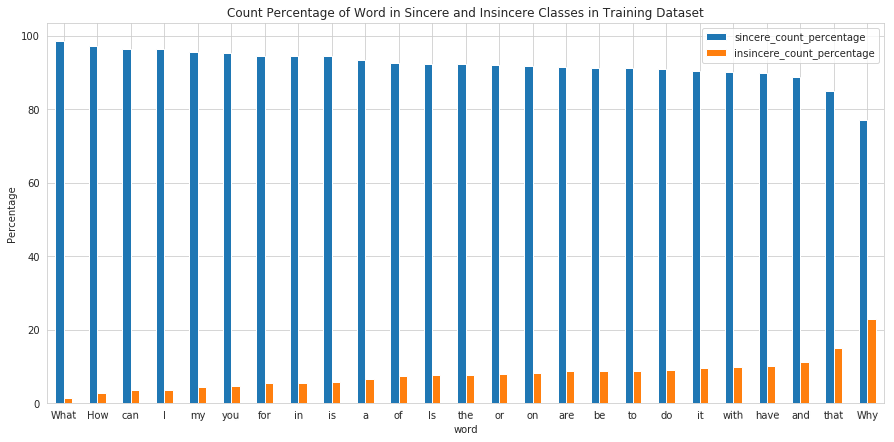

In [29]:
ax = selection[['sincere_count_percentage', 'insincere_count_percentage']].plot.bar(rot = 1)
ax.set_ylabel("Percentage")
ax.set_title("Count Percentage of Word in Sincere and Insincere Classes in Training Dataset")

Text(0.5,1,'Ratio of Word (Sincere to Insincere) in Training Dataset')

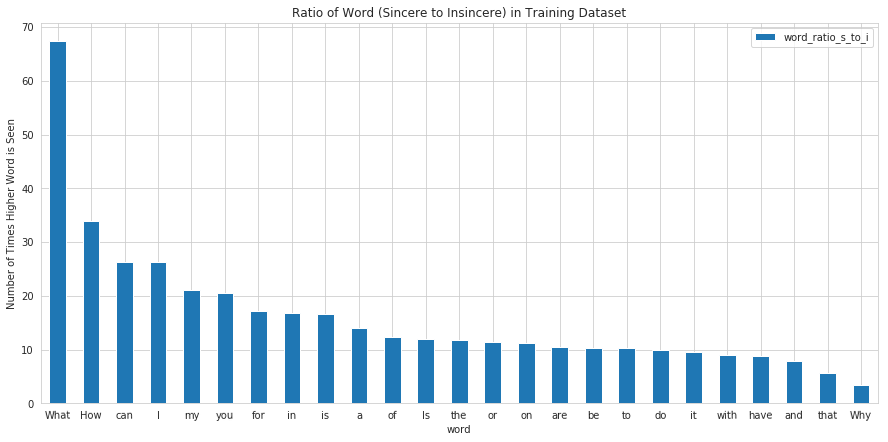

In [30]:
ax = selection[['word_ratio_s_to_i']].plot.bar(rot = 1)
ax.set_ylabel("Number of Times Higher Word is Seen")
ax.set_title("Ratio of Word (Sincere to Insincere) in Training Dataset")

In [31]:
sincere_count_df = pd.DataFrame.from_dict(sincere_dictionary, orient='index')
sincere_count_df.columns = ['word_count']
sincere_count_df.sort_values(by = ['word_count'], inplace = True, ascending = False)
sincere_count_df.reset_index(inplace = True)
sincere_count_df.columns = ['word', 'word_count']
sincere_count_df.head()

,word,word_count
0,the,602699
1,What,411696
2,a,375985
3,to,367473
4,in,342723


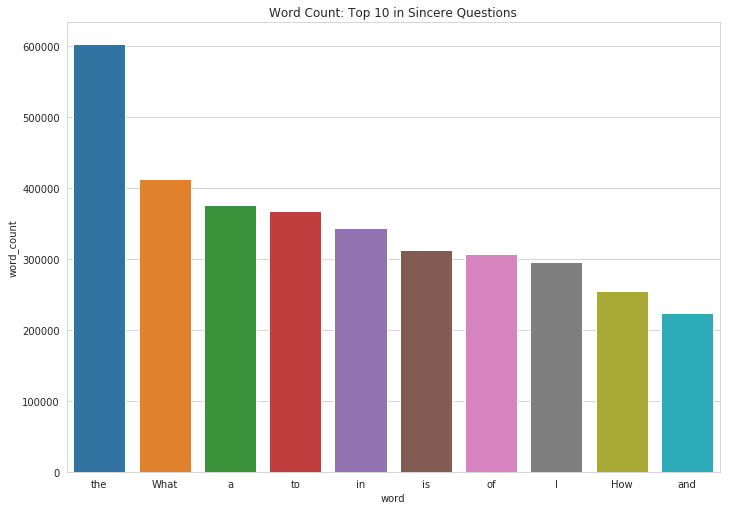

In [32]:
words_selected = 10
rcParams['figure.figsize'] = 11.7,8.27

plt.title("Word Count: Top " + str(words_selected) + " in Sincere Questions")
sns.barplot(x = 'word', y = 'word_count', data = sincere_count_df.head(words_selected))

In [33]:
insincere_count_df = pd.DataFrame.from_dict(insincere_dictionary, orient='index')
insincere_count_df.columns = ['word_count']
insincere_count_df.sort_values(by = ['word_count'], inplace = True, ascending = False)
insincere_count_df.reset_index(inplace = True)
insincere_count_df.columns = ['word', 'word_count']
insincere_count_df.head()

,word,word_count
0,the,51249
1,to,35710
2,Why,32673
3,and,28167
4,a,26697


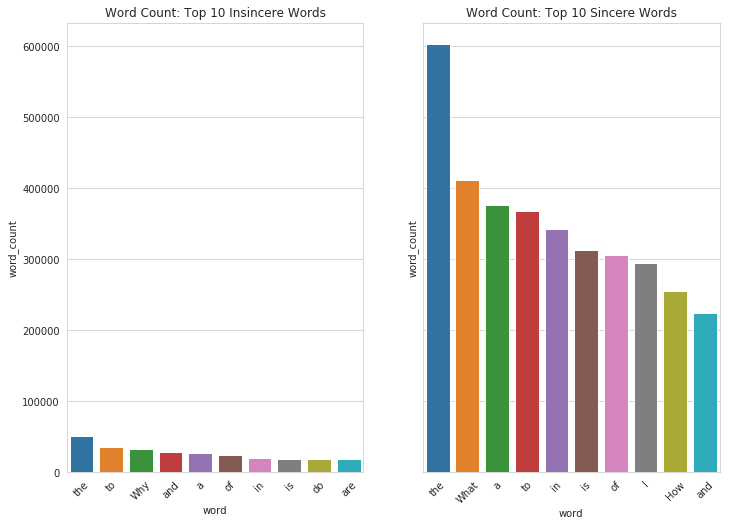

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, sharey = True)
sns.barplot(x = insincere_count_df['word'].head(10), y = insincere_count_df['word_count'], ax = ax1)
sns.barplot(x = sincere_count_df['word'].head(10), y = sincere_count_df['word_count'], ax = ax2)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 45)
ax1.title.set_text('Word Count: Top 10 Insincere Words')
ax2.title.set_text('Word Count: Top 10 Sincere Words')

In [35]:
insincere['question_text_2gram'] = insincere['question_text'].apply(
        lambda x: [' '.join(ng) for ng in everygrams(word_tokenize(x), 2)])

In [36]:
insincere.head()

,qid,question_text,target,question_text_processed,spelling_error_count,contains_spelling_errors,question_text_2gram
0,0000e91571b60c2fb487,Has the United States become the largest dicta...,1,Has the United States become the largest dicta...,0,False,"[Has the, the United, United States, States be..."
1,00013ceca3f624b09f42,Which babies are more sweeter to their parents...,1,Which babies are more sweeter to their parents...,0,False,"[Which babies, babies are, are more, more swee..."
2,0004a7fcb2bf73076489,If blacks support school choice and mandatory ...,1,If blacks support school choice and mandatory ...,1,True,"[If blacks, blacks support, support school, sc..."
3,00052793eaa287aff1e1,I am gay boy and I love my cousin (boy). He is...,1,I am gay boy and I love my cousin boy He is se...,2,True,"[I am, am gay, gay boy, boy and, and I, I love..."
4,000537213b01fd77b58a,Which races have the smallest penis?,1,Which races have the smallest penis,0,False,"[Which races, races have, have the, the smalle..."


In [ ]:
sincere['question_text_2gram'] = sincere['question_text'].apply(
        lambda x: [' '.join(ng) for ng in everygrams(word_tokenize(x), 2)])